In [61]:
# These are the imports I used, you can use whatever import you like to achieve the task
import numpy as np
import librosa 
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import pyaudio 
import wave

BASE_DIR = "./"  # Saves in current working directory (easiest way to do it)

In [62]:
audio = pyaudio.PyAudio()

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
OUTPUT_FILENAME = "output.wav"

stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=1024)

print("Recording...")

Recording...


In [63]:
frames = [] 

for _ in range(0, int(RATE / 1024 * RECORD_SECONDS)) :
    data = stream.read(1024)
    frames.append(data); 

print("Finished Recording")


Finished Recording


In [64]:
stream.stop_stream()
stream.close()

audio.terminate()

In [65]:
with wave.open(OUTPUT_FILENAME, 'wb') as wf: 
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))



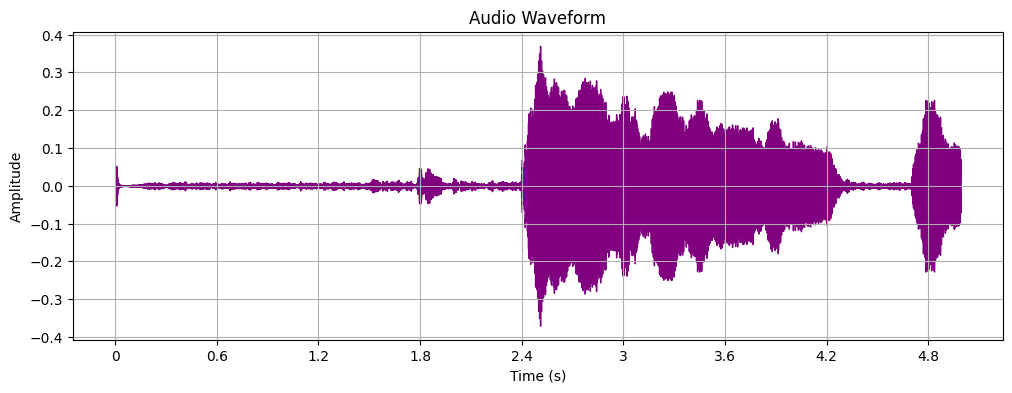

In [66]:
audio_file = 'output.wav'
y, sr = librosa.load(audio_file); 

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, color = 'purple')

plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show() 


In [67]:
max_amplitude_index = np.argmax(np.abs(y))
time_of_max_amplitude = max_amplitude_index / sr
formatted_time = "{:.2f}".format(time_of_max_amplitude)


print(f"Time of highest amplitude: {formatted_time} seconds")

55318
22050
Time of highest amplitude: 2.51 seconds
